In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
import ternary
import math

In [2]:
column_names=[
            "kill_radius", "inhibit_radius", "grow_radius",
            "kill_margin", "inhibit_margin",
            "mutate_size", "version",
            "species_bin", "max_species", "epochs", "num_species",
            "mean_SD", "var_SD", "mean_EqI", "var_EqI"]

In [3]:
d1 = pd.read_csv("/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_0_5_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_0_0_.csv", delimiter=",", header=None)

FileNotFoundError: [Errno 2] File /home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_0_5_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_0_0_.csv does not exist: '/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_0_5_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_0_0_.csv'

In [4]:
d1.columns = column_names

In [5]:
d1

,kill_radius,inhibit_radius,grow_radius,kill_margin,inhibit_margin,mutate_size,version,species_bin,max_species,epochs,num_species,mean_SD,var_SD,mean_EqI,var_EqI
0,0,0,0,0.000000,0.000000,0.000000,0,0.05,8000,1000,5,0.00000,0.000000,0.000000,0.000000
1,0,0,0,0.000000,0.055556,0.000000,0,0.05,8000,1000,5,0.00000,0.000000,0.000000,0.000000
2,0,0,0,0.000000,0.111111,0.000000,0,0.05,8000,1000,5,0.00000,0.000000,0.000000,0.000000
3,0,0,0,0.000000,0.166667,0.000000,0,0.05,8000,1000,5,0.00000,0.000000,0.000000,0.000000
4,0,0,0,0.000000,0.222222,0.000000,0,0.05,8000,1000,5,0.00000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21161,4,4,1,0.111111,0.055556,0.022222,0,0.05,8000,1000,1001,8.70125,1.499490,0.671093,0.450821
21162,4,4,1,0.111111,0.111111,0.022222,0,0.05,8000,1000,194,7.41956,3.569120,0.572241,0.329157
21163,4,4,1,0.111111,0.166667,0.022222,0,0.05,8000,1000,7,0.20845,0.147877,0.016077,0.000302
21164,4,4,1,0.111111,0.222222,0.022222,0,0.05,8000,1000,1001,8.77204,1.436450,0.676555,0.458189


In [69]:
data_list = []
for p in glob.glob("/home/leewang/Documents/Datasets/MicroEvo/dataC/*.csv"):
    data = pd.read_csv(p, header=None, delimiter=",")
    data.columns = column_names
    data_list.append(data)
final_data = pd.concat(data_list)

In [80]:
i = 0
j = 0
for p in glob.glob("/home/leewang/Documents/Datasets/MicroEvo/dataC/*2_.csv"):
    data = pd.read_csv(p, header=None, delimiter=",")
    data.columns = column_names
    print("{}: {}".format(p, data.shape[0]))
    i += 1
    if data.shape[0] == 27000:
        j += 1
print("total = {}".format(i))
print("complete = {}".format(j))

/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.0_0.2222222222222222_5_2_2_.csv: 18750
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_6_10_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.2777777777777778_0.5_5.0_2_2_.csv: 18750
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_6_10_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_2_2_.csv: 11820
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_6_10_0.11111111111111112_0.2_5.0_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_2_2_.csv: 15625
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_0_5_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 14785
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.2777777777777778_0.5_5.0_2_2_.csv: 22500
/home/leewang/Documents/Datasets/MicroEvo/dat

/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_6_10_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.0_0.2222222222222222_5_2_2_.csv: 5581
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_0_5_6_10_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 22500
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 18750
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 15625
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.2777777777777778_0.5_5.0_2_2_.csv: 13274
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_0_5_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 7946
/home/leewang/Documents/Datasets/Micr

In [87]:
i = 0
j = 0
for p in glob.glob("/home/leewang/Documents/Datasets/MicroEvo/dataC/v2*2_.csv"):
    data = pd.read_csv(p, header=None, delimiter=",")
    data.columns = column_names
    print("{}: {}".format(p, data.shape[0]))
    i += 1
    if data.shape[0] in [27000, 22500, 18750]: #[6x6x6, 6x6x5, 6x5x5]
        j += 1
print("total = {}".format(i))
print("complete = {}".format(j))

/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.0_0.2222222222222222_5_2_2_.csv: 18750
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_6_10_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.2777777777777778_0.5_5.0_2_2_.csv: 18750
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_6_10_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_2_2_.csv: 11820
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_6_10_0.11111111111111112_0.2_5.0_0.0_0.2222222222222222_5_0.0_0.2222222222222222_5_2_2_.csv: 15625
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_0_5_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 14785
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_0_5_6_10_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.2777777777777778_0.5_5.0_2_2_.csv: 22500
/home/leewang/Documents/Datasets/MicroEvo/dat

/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 18750
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 15625
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_0_5_0.0_0.08888888888888889_5_0.0_0.2222222222222222_5_0.2777777777777778_0.5_5.0_2_2_.csv: 13274
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_0_5_0_5_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 7946
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_0_5_0.0_0.08888888888888889_5_0.2777777777777778_0.5_5.0_0.2777777777777778_0.5_5.0_2_2_.csv: 8070
/home/leewang/Documents/Datasets/MicroEvo/dataC/v2_6_10_6_10_6_10_0.11111111111111112_0.2_5.0_0.2777777777777778_0.5_5.0_0.0_0.2222222222222222_5_2_2_.csv: 15625
/home/leewang/Documents/Datasets/M

In [70]:
final_data = final_data.query("(version == 2 | version == 3)")

In [71]:
for i in range(7):
    print("VERSION {}: {}".format(i, final_data[final_data["version"] == i].shape[0]))

VERSION 0: 0
VERSION 1: 0
VERSION 2: 1105618
VERSION 3: 1105212
VERSION 4: 0
VERSION 5: 0
VERSION 6: 0


In [49]:
final_data.query("(kill_radius==8)&(inhibit_radius==2)&(grow_radius==0)&(abs(0.0222 - mutate_size) < 0.01)")

,kill_radius,inhibit_radius,grow_radius,kill_margin,inhibit_margin,mutate_size,version,species_bin,max_species,epochs,num_species,mean_SD,var_SD,mean_EqI,var_EqI
10525,8,2,0,0.000000,0.277778,0.022222,3,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10526,8,2,0,0.000000,0.333333,0.022222,3,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10527,8,2,0,0.000000,0.388889,0.022222,3,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10528,8,2,0,0.000000,0.444444,0.022222,3,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10529,8,2,0,0.000000,0.500000,0.022222,3,0.05,8000,1000,5,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10545,8,2,0,0.222222,0.277778,0.022222,2,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10546,8,2,0,0.222222,0.333333,0.022222,2,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10547,8,2,0,0.222222,0.388889,0.022222,2,0.05,8000,1000,5,0.0,0.0,0.0,0.0
10548,8,2,0,0.222222,0.444444,0.022222,2,0.05,8000,1000,5,0.0,0.0,0.0,0.0


In [8]:
final_data[100000:]

,kill_radius,inhibit_radius,grow_radius,kill_margin,inhibit_margin,mutate_size,version,species_bin,max_species,epochs,num_species,mean_SD,var_SD,mean_EqI,var_EqI
16953,5,8,6,0.000000,0.444444,0.177778,1,0.05,8000,1000,39,11.200900,8.263260,0.863882,0.765932
16954,5,8,6,0.000000,0.500000,0.177778,1,0.05,8000,1000,40,11.172500,8.600070,0.861695,0.761557
16955,5,8,6,0.055556,0.277778,0.177778,1,0.05,8000,1000,41,11.305200,8.459100,0.871925,0.779260
16956,5,8,6,0.055556,0.333333,0.177778,1,0.05,8000,1000,39,11.072900,9.247780,0.854011,0.748528
16957,5,8,6,0.055556,0.388889,0.177778,1,0.05,8000,1000,40,11.217900,8.549670,0.865194,0.767754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8787,8,2,6,0.111111,0.111111,0.022222,1,0.05,8000,1000,41,5.943220,2.262450,0.458377,0.215362
8788,8,2,6,0.111111,0.166667,0.022222,1,0.05,8000,1000,73,5.778790,2.040190,0.445695,0.201403
8789,8,2,6,0.111111,0.222222,0.022222,1,0.05,8000,1000,42,5.957270,3.649360,0.459461,0.216253
8790,8,2,6,0.166667,0.000000,0.022222,1,0.05,8000,1000,53,5.682260,2.411350,0.438250,0.195757


#### min/max data ranges for the rows

In [22]:
min_data = final_data.min(0)
max_data = final_data.max(0)
for k in min_data.index:
    print("{}\t\t{}\t\t{}".format(k, min_data[k], max_data[k]))

kill_radius		0.0		10.0
inhibit_radius		0.0		10.0
grow_radius		0.0		10.0
kill_margin		0.0		0.5
inhibit_margin		0.0		0.5
mutate_size		0.0		0.2
version		2.0		5.0
species_bin		0.05		0.05
max_species		8000.0		8000.0
epochs		1000.0		1000.0
num_species		5.0		1001.0
mean_SD		0.0		12.7641
var_SD		0.0		23.3168
mean_EqI		0.0		0.984442
var_EqI		0.0		0.970089


In [23]:
def get_param_pair(data, freeze_params, param_a, param_b, param_c, quiet=True):
    query = ""
    int_params = {k : d for k,d in freeze_params.items() if k in ["kill_radius", "inhibit_radius", "grow_radius"]}
    float_params = {k : d for k,d in freeze_params.items() if k not in int_params.keys()}
    
    for i,(k,d) in enumerate(int_params.items()):
        query += "({} == {})".format(k, int_params[k]) \
                    if k in int_params.keys() else ""
        if i < len(int_params) - 1 or len(float_params) > 0:
            query += "&"
    for i,(k,d) in enumerate(float_params.items()):
        query += "(abs({} - {}) < {})".format(k, float_params[k], 0.01) \
                    if k in float_params.keys() else ""
        if i < len(float_params) - 1:
            query += "&"
    if not quiet:
        print("QUERY: {}".format(query))
    data_subset = data.query(query)[[param_a, param_b, param_c]]
    data_subset = data_subset.pivot(param_a, param_b, param_c)
    return data_subset
#     inhibit_grow_subset = final_data[
#         (final_data["kill_radius"] == freeze_params["kill_radius"]) &
#         (abs(final_data["kill_margin"] - freeze_params["kill_margin"]) < 0.01) &
#         (abs(final_data["inhibit_margin"] - 0.111) < 0.01) &
#         (abs(final_data["mutate_size"] - 0.044) < 0.01) &
#         (final_data["version"] == 1)
#     ][["inhibit_radius", "grow_radius", "mean_SD"]]

In [24]:
def get_ternary_value_pivot(data, freeze_params, param_a, param_b, param_c, value, quiet=True):
    query = ""
    int_params = {k : d for k,d in freeze_params.items() if k in ["kill_radius", "inhibit_radius", "grow_radius"]}
    float_params = {k : d for k,d in freeze_params.items() if k not in int_params.keys()}
    
    for i,(k,d) in enumerate(int_params.items()):
        query += "({} == {})".format(k, int_params[k]) \
                    if k in int_params.keys() else ""
        if i < len(int_params) - 1 or len(float_params) > 0:
            query += "&"
    for i,(k,d) in enumerate(float_params.items()):
        query += "(abs({} - {}) < {})".format(k, float_params[k], 0.01) \
                    if k in float_params.keys() else ""
        if i < len(float_params) - 1:
            query += "&"
    if not quiet:
        print("QUERY: {}".format(query))
    data_subset = data.query(query)[[param_a, param_b, param_c, value]]
    data_subset = data_subset.pivot_table(values=value, index=[param_a, param_b], columns=[param_c])
    return data_subset

In [25]:
param_ranges = {}
for k in final_data.columns[:10]:
    un = np.sort(final_data[k].unique())
    param_ranges[k] = un
[print(k, param_ranges[k]) for k in param_ranges.keys()]

kill_radius [ 0  1  2  3  4  5  6  7  8  9 10]
inhibit_radius [ 0  1  2  3  4  5  6  7  8  9 10]
grow_radius [ 0  1  2  3  4  5  6  7  8  9 10]
kill_margin [0.        0.0555556 0.111111  0.166667  0.222222  0.277778  0.333333
 0.388889  0.444444  0.5      ]
inhibit_margin [0.        0.0555556 0.111111  0.166667  0.222222  0.277778  0.333333
 0.388889  0.444444  0.5      ]
mutate_size [0.        0.0222222 0.0444444 0.0666667 0.0888889 0.111111  0.133333
 0.155556  0.177778  0.2      ]
version [2 3 4 5]
species_bin [0.05]
max_species [8000]
epochs [1000]


[None, None, None, None, None, None, None, None, None, None]

In [26]:
from copy import copy
from matplotlib.ticker import FormatStrFormatter

def heatmap_subplots(rows, cols, figsize, 
                     param_to_iter, other_param_values,
                    param_a, param_b, param_c,
                    hue_a, hue_b, title=None):
    fig, ax = plt.subplots(rows, cols, figsize=figsize)
    if title is None:
        fig.suptitle("{} vs {} over {} with {}".format(
                    param_a, param_b, param_to_iter, param_c
        ), fontsize=20)
    else:
        fig.suptitle(title, fontsize=20)
    fig.tight_layout()
    fig.subplots_adjust(top=0.95, hspace=0.2)
    ps = {}
    for k,v in other_param_values.items():
        ps[k] = v
    for i,v in enumerate(param_ranges[param_to_iter]):
        fps = copy(ps)
        fps[param_to_iter] = v
        data_subset = get_param_pair(
                            final_data,
                            fps,
                            param_a = param_a,
                            param_b = param_b,
                            param_c = param_c)
        a = ax[i // cols, i % cols]
        a.set_title("{} = {:.3f}".format(param_to_iter, v))
        cm = sns.diverging_palette(hue_a, hue_b, as_cmap=True)
#         y_format = a.yaxis.get_major_formatter()
#         y_format.seq = ["{:0.3f}".format(float(s)) for s in y_format.seq]
#         a.yaxis.set_major_formatter(y_format)
#         a.xaxis.set_major_formatter(FormatStrFormatter('%0.2f'))
        precision = 3
        sns.heatmap(data_subset, ax=a, cmap=cm, 
                    xticklabels=data_subset.columns.values.round(precision),
                    yticklabels=data_subset.columns.values.round(precision)) #, cmap="PiYG")

# sample plots

### e_i vs m over e_k w/ SD_mean

ValueError: zero-size array to reduction operation fmin which has no identity

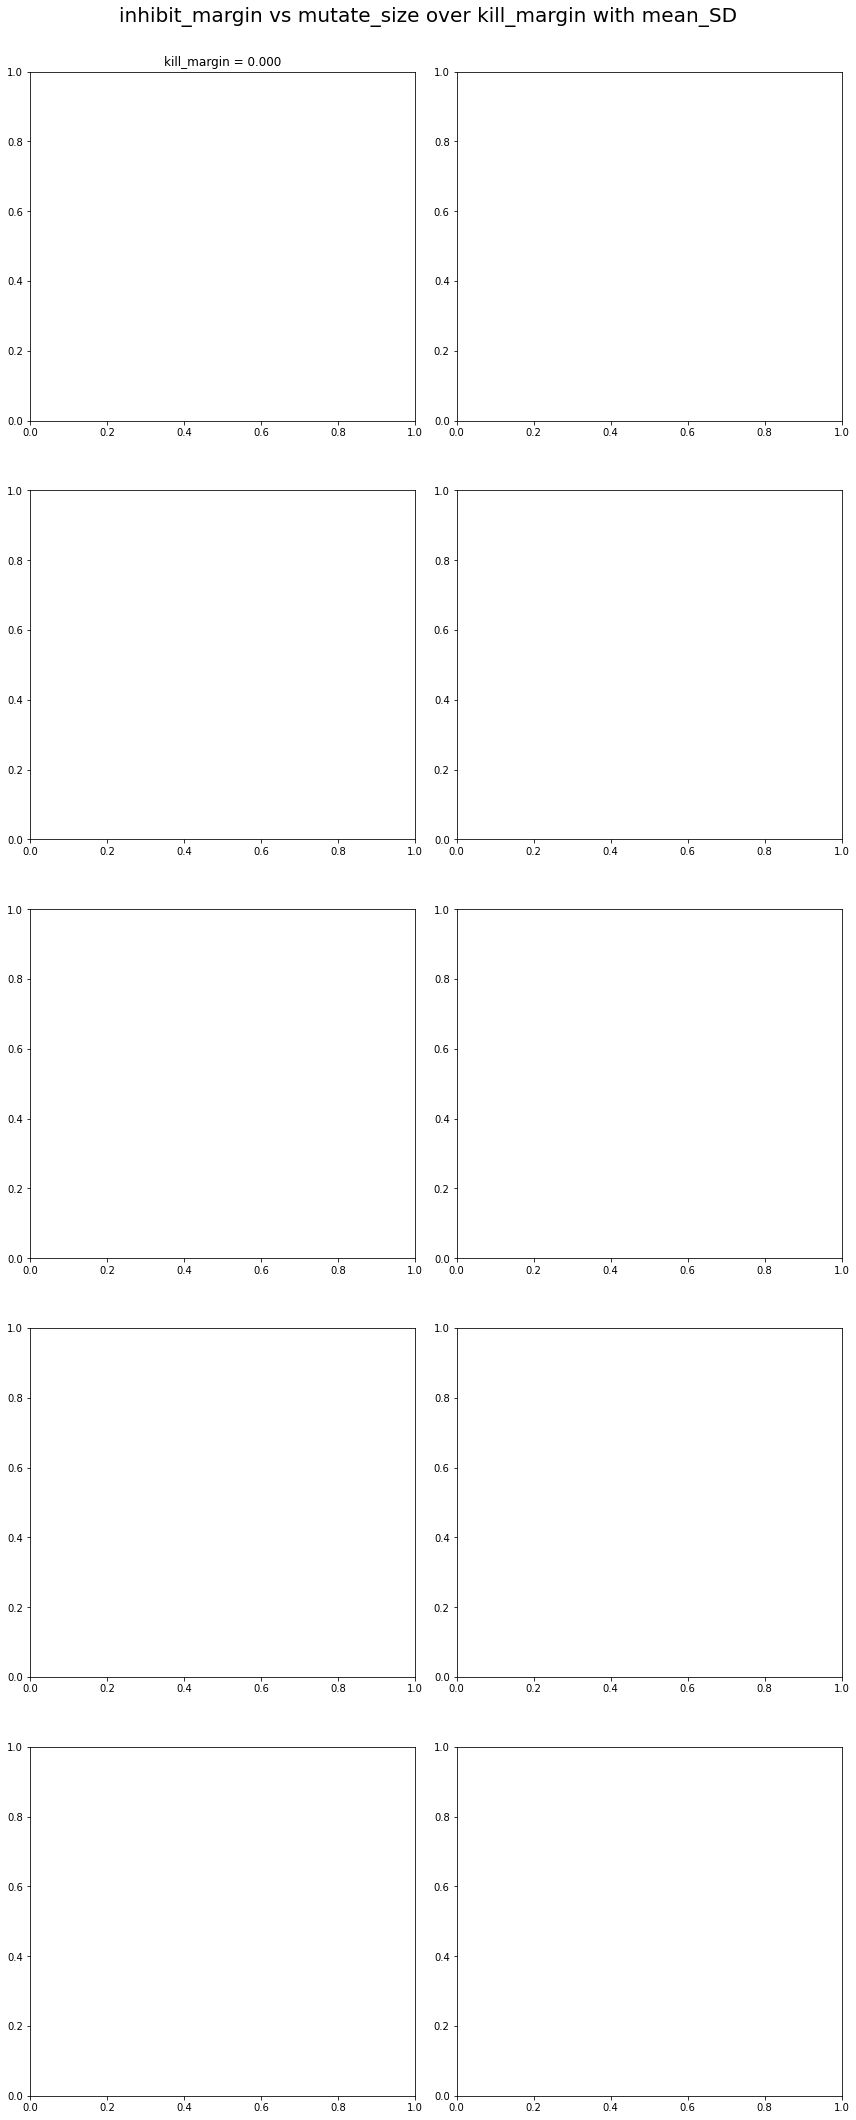

In [27]:
heatmap_subplots(rows=5, cols=2, figsize=(12, 30),
#                 title=r"$r_i$ vs. $r_g$ over $\epsilon_k$ with $SD_{mean}$",
                param_to_iter="kill_margin",
                other_param_values={
                    "kill_radius" : 6,
                    "inhibit_radius" : 6,
                    "grow_radius" : 6,
#                     "inhibit_margin" : 0.111,
#                     "mutate_size" : 0.044,
                    "version" : 1},
                param_a="inhibit_margin",
                param_b="mutate_size",
                param_c="mean_SD",
                hue_a=220,
                hue_b=20)

### r_i vs r_g over e_k w/ SD_mean

ValueError: zero-size array to reduction operation fmin which has no identity

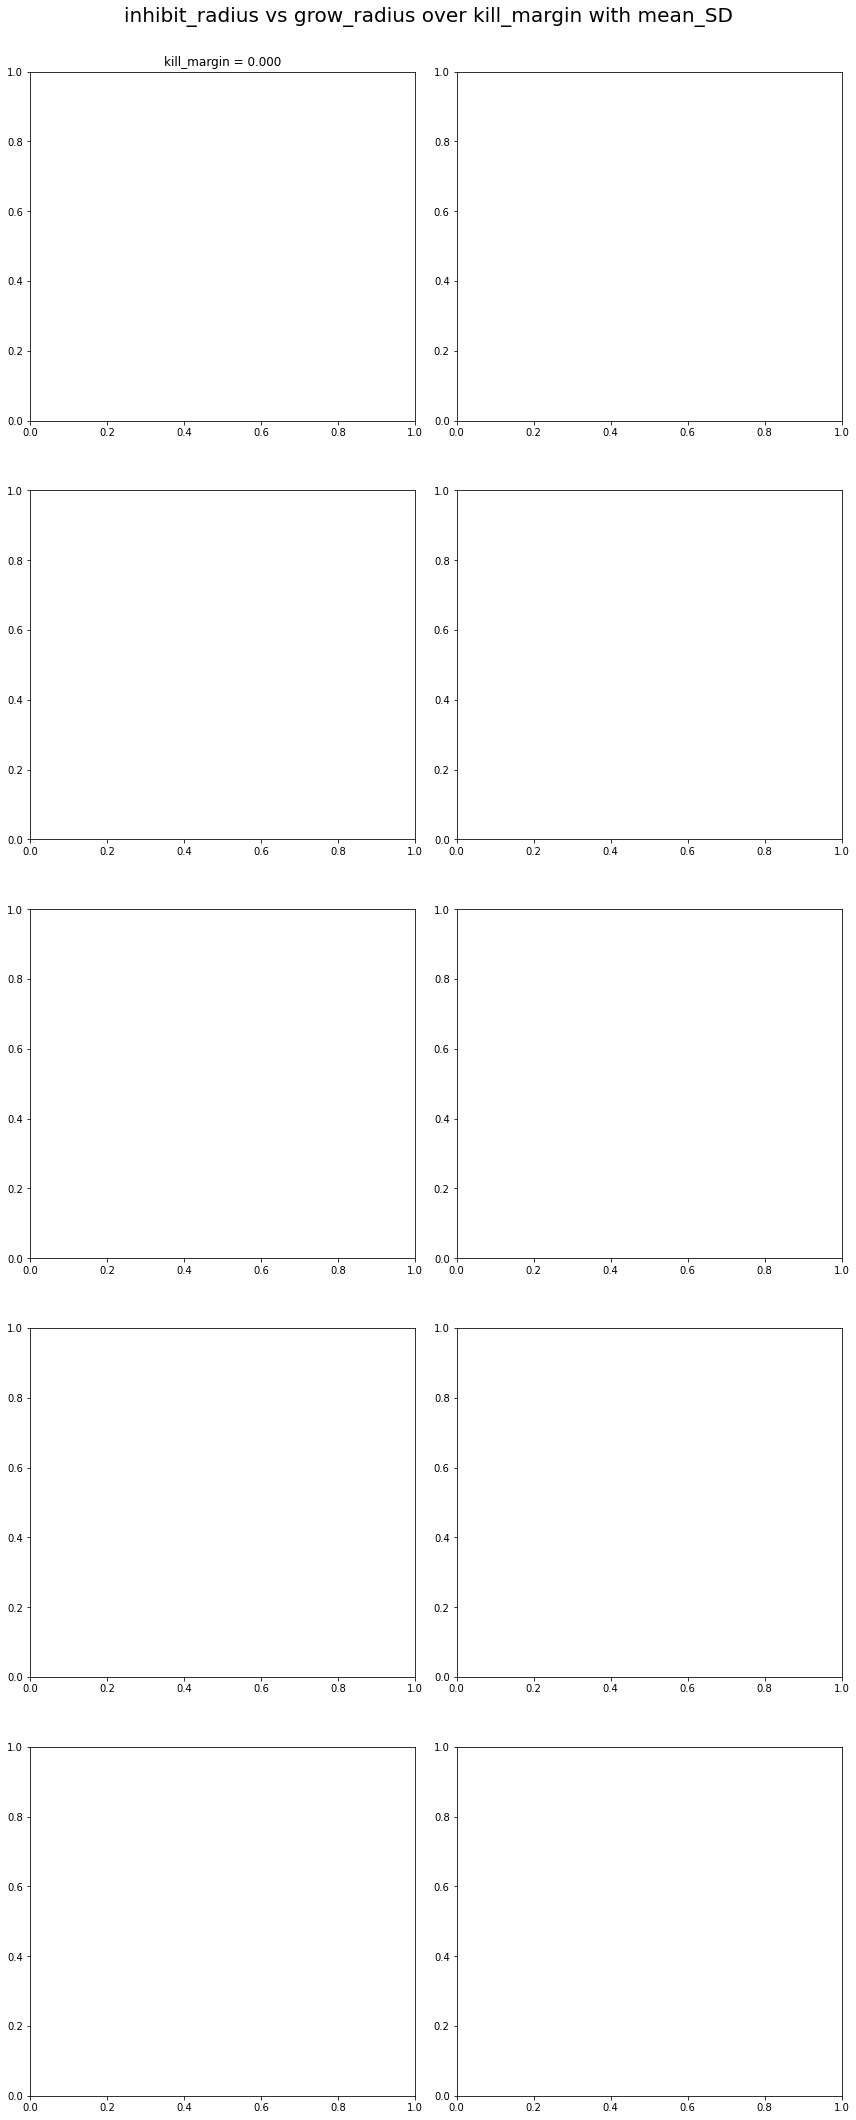

In [28]:
heatmap_subplots(rows=5, cols=2, figsize=(12, 30),
                param_to_iter="kill_margin",
                other_param_values={
                    "kill_radius" : 6,
#                     "inhibit_radius" : 6,
#                     "grow_radius" : 6,
                    "inhibit_margin" : 0.111,
                    "mutate_size" : 0.066,
                    "version" : 1},
                param_a="inhibit_radius",
                param_b="grow_radius",
                param_c="mean_SD",
                hue_a=220,
                hue_b=20)

### Ternary Plotting

In [ ]:
result = get_ternary_value_pivot(final_data,
                        freeze_params={
                            "kill_radius" : 6,
                            "inhibit_radius" : 6,
                            "grow_radius" : 6,
#                             "inhibit_margin" : 0.111,
#                             "mutate_size" : 0.066,
                            "version" : 1},
                        param_a="kill_margin",
                        param_b="inhibit_margin",
                        param_c="mutate_size",
                        value="mean_SD",
                        quiet=False)
result

In [29]:
# result.iloc[[0,1,2]]
# for e in result.index:
#     print(e)
# print(len(result))
result.loc[0]
# result.columns
# result.loc[1,0]

KeyError: 0.0

In [30]:
def ternary_iterate(final_data, freeze_params, param_a, param_b, param_c, value, quiet=True):
    result = get_ternary_value_pivot(
                data = final_data,
                freeze_params = freeze_params,
                param_a = param_a,
                param_b = param_b,
                param_c = param_c,
                value = value,
                quiet = quiet)
    p_ranges = [
        param_ranges[param_a],
        param_ranges[param_b],
        result.columns,
    ]
    look_up_indices = np.ndarray(
        shape=(len(p_ranges[0]), len(p_ranges[1]), len(p_ranges[2])), dtype=object)
#     print(look_up_indices.shape)
#     for e in result.index:
#         for c in result.columns:
#             look_up_indices.append((e[0], e[1], c))

#     print(result)

    for i in range(len(p_ranges[0])):
        for j in range(len(p_ranges[1])):
            v = i * len(p_ranges[2]) + j
            for k,k_v in enumerate(result.columns):
#                 print(k,k_v,v)
#                 print(len(result.index))
#                 print(len(result))
#                 print(np.shape(look_up_indices))
                try:
                    r = result.index[v]
                    look_up_indices[i,j,k] = (r[0], r[1], k_v)
                except:
                    look_up_indices[i,j,k] = (-1, -1, -1)
                
    if not quiet:
        print(look_up_indices)
#     print(result)
    def t_function(p):
#         print(p)
        p_lo = [-1, -1, -1]
        p_hi = [-1, -1, -1]
        p_perc = [-1, -1, -1]
        for i in range(len(p)):
            p_real = p[i]*float(len(p_ranges[i]))
            p_lo[i] = min(max(math.floor(p[i]*len(p_ranges[i])), 0), len(p_ranges[i])-1)
            p_hi[i] = min(max(math.ceil(p[i]*len(p_ranges[i])), 0), len(p_ranges[i])-1)
            p_perc[i] = p_real - p_lo[i]
#         print(p)
        indices_lo = look_up_indices[p_lo[0], p_lo[1], p_lo[2]]
        if indices_lo == (-1,-1,-1):
            value_lo = 0.0
        else:
            value_lo = result.loc[indices_lo[0], indices_lo[1]][indices_lo[2]]
#         indices_hi = look_up_indices[p_hi[0], p_hi[1], p_hi[2]]
#         value_hi = result.loc[indices_hi[0], indices_hi[1]][indices_hi[2]]
#         value = value_hi * p_perc + (1.0 - p_perc) * value_lo
        value = value_lo
#         print(p, value)
#         print(value_lo, value_hi, p_perc, p_real, p_lo, p_hi, p, value)
        
        return value
    return t_function, result

In [31]:
def plot_ternary(final_data, freeze_params, param_a, param_b, param_c, value, quiet=True):
    t_function, result = ternary_iterate(final_data,
                        freeze_params=freeze_params,
                        param_a=param_a,
                        param_b=param_b,
                        param_c=param_c,
                        value=value,
                        quiet=True)
    scale = 11
    fig, tax = ternary.figure(scale=scale)
    fig.set_size_inches(15, 12)
    tax.heatmapf(t_function, style='triangular', cmap="Reds", 
                 cb_kwargs={
                     "orientation" : "vertical",
                     "shrink" : 0.5,
                     "format" : '%.1f',                   
                 }, scientific=False)
    tax.boundary(linewidth=4.0)
    fontsize = 20
    offset = 0.12
    offset_bottom = -0.04
    tax.left_axis_label(param_c, offset=offset, fontsize=fontsize)
    tax.right_axis_label(param_b, offset=offset, fontsize=fontsize)
    tax.bottom_axis_label(param_a, offset=offset_bottom, fontsize=fontsize)
    tax.set_title(value, fontsize=fontsize*2)
#     tax.ticks(axis='lbr', linewidth=1, multiple=1)
    def range_to_str(d, dec=3):
        dec = 10**dec
        return [str(int(s*dec)/dec) for s in d]
    tik_dec=2
    tik_offset=0.015
    tax.ticks(axis='l', ticks=range_to_str(param_ranges[param_c], dec=tik_dec), offset=tik_offset)
    tax.ticks(axis='r', ticks=range_to_str(param_ranges[param_b], dec=tik_dec), offset=tik_offset)
    tax.ticks(axis='b', ticks=range_to_str(param_ranges[param_a], dec=tik_dec), offset=tik_offset)
    
    for i,k in enumerate(freeze_params.keys()):
        tax.get_axes().text(10, 8 + i*0.5, "{}: {:.3f}".format(k, freeze_params[k]), fontsize=20)
    
    tax.get_axes().axis("off")
    tax.clear_matplotlib_ticks()
    
    return result

IndexError: index -1 is out of bounds for axis 2 with size 0

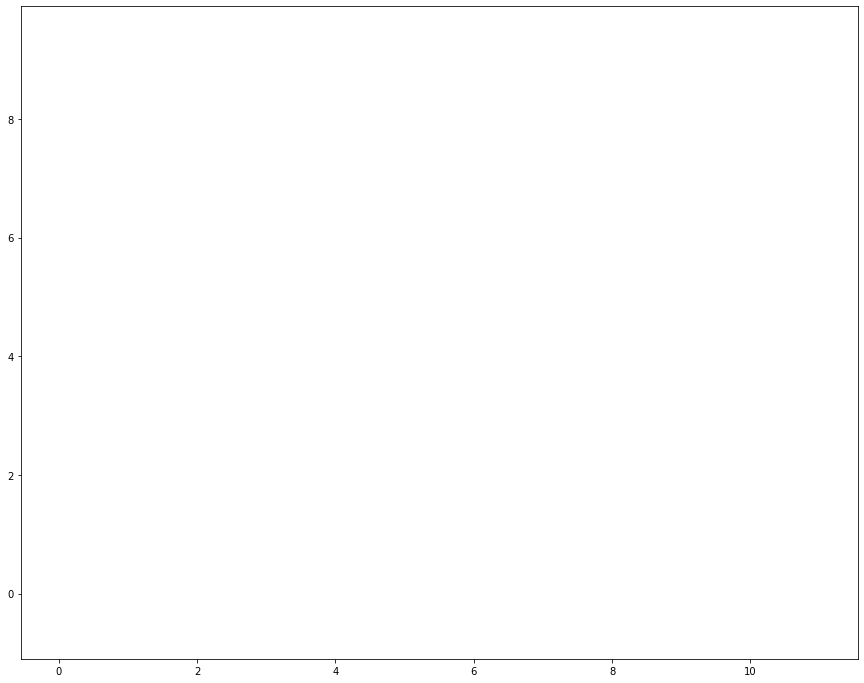

In [32]:
result = plot_ternary(final_data,
                        freeze_params={
                            "kill_radius" : 6,
        #                     "inhibit_radius" : 6,
        #                     "grow_radius" : 6,
                            "inhibit_margin" : 0.111,
                            "mutate_size" : 0.066,
                            "version" : 1},
                        param_a="kill_margin",
                        param_b="inhibit_radius",
                        param_c="grow_radius",
                        value="mean_SD",
                        quiet=True)

IndexError: index -1 is out of bounds for axis 2 with size 0

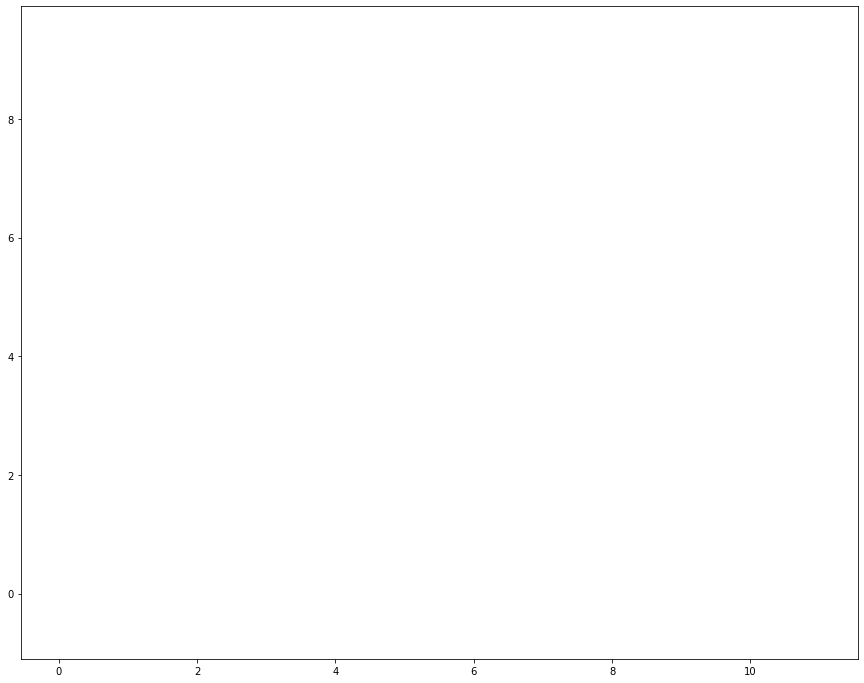

In [33]:
result = plot_ternary(final_data,
                        freeze_params={
                            "kill_radius" : 6,
                            "inhibit_radius" : 6,
                            "grow_radius" : 6,
#                             "inhibit_margin" : 0.111,
#                             "mutate_size" : 0.066,
                            "version" : 1},
                        param_a="kill_margin",
                        param_b="inhibit_margin",
                        param_c="mutate_size",
                        value="mean_SD",
                        quiet=False)

In [11]:
pBad = ["max_species", "epochs", "species_bin", "version"]
pkeys = [p for p in list(param_ranges.keys()) if p not in pBad]
n = len(pkeys)
for i in range(n):
    for j in range(i+1, n):
# for i in range(1):
#     for j in range(i+1, i+2):
        for k in range(j+1, n):
            pA = pkeys[i]
            pB = pkeys[j]
            pC = pkeys[k]
            pAll = [pA, pB, pC]
            pAll.extend(pBad)
            freeze_params = [p for p in pkeys if p not in pAll]
            freeze_params_dict = {
                p : param_ranges[p][2] for p in freeze_params
            }
            print(pA, pB, pC, freeze_params_dict)
            plot_ternary(final_data,
                        freeze_params=freeze_params_dict,
                        param_a=pA,
                        param_b=pB,
                        param_c=pC,
                        value="mean_SD",
                        quiet=False)

kill_radius inhibit_radius grow_radius {'kill_margin': 0.11111099999999999, 'inhibit_margin': 0.11111099999999999, 'mutate_size': 0.0444444}


NameError: name 'plot_ternary' is not defined